In [1]:
import pandas as pd 
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
from datetime import datetime, timedelta
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv(r'C:\Users\acer\Desktop\6th sem project\output.csv')

In [45]:
df

,cid,text,time,author
0,UgyhDi6HmVVYCZ3CoKN4AaABAg,nice﻿,1 week ago,Akshay jadhav
1,UgyhDi6HmVVYCZ3CoKN4AaABAg.8ro20d8_0mC8roVxuYpaRC,thanks!﻿,1 week ago,Bharatendra Rai
2,UgyqKlNw1tN_jLOd1LF4AaABAg,"may someone could help me why am I getting ""No...",3 weeks ago,9834 Ljk
3,Ugyz8WOzqPQP_fmSsWJ4AaABAg,Sir following code was running correctly earli...,3 weeks ago,Sachin Jaisar
4,Ugyi5X7A69l1HTw-yCh4AaABAg,Great and very nice explain 👌👌💐💐💐💐👍﻿,1 month ago,Dnyaneshwar Panchal
...,...,...,...,...
195,UgyOfeExSEV_o6Glilh4AaABAg.8ZoszTpVNcE8ZtWIKbJa7j,"I tried this modification. Unfortunately, it i...",1 year ago,DEBASMITA DEY
196,UgyOfeExSEV_o6Glilh4AaABAg.8ZoszTpVNcE8Zw0AfdG705,probably you missed something in earlier lines...,1 year ago,Bharatendra Rai
197,UgyOfeExSEV_o6Glilh4AaABAg.8ZoszTpVNcE8_Wdphd2Zh7,"I am also getting the same error, if you got a...",1 year ago,Kishor Kumar
198,UgyOfeExSEV_o6Glilh4AaABAg.8ZoszTpVNcE8adK0HVk1dw,i think you left spaces while copying the API ...,1 year ago,Febin Xavier RCBS


In [51]:
class SentimentAnalyzer(object):
    def __init__(self):
        pass
     
    def clean_text(self, text):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())
    
    def get_sentiment(self, text):
        cleaned_text = self.clean_text(text)
        analysis = TextBlob(cleaned_text)
        polarity = analysis.sentiment.polarity
        if polarity > 0:
            return 'positive'
        elif polarity < 0:
            return 'negative'
        else:
            return 'neutral'
    def analyze_sentiments(self, dataset):
        
      
        dataset['sentiment'] = dataset['text'].apply(self.get_sentiment)
        
        
        total_count = len(dataset)
        positive_count = len(dataset[dataset['sentiment'] == 'positive'])
        negative_count = len(dataset[dataset['sentiment'] == 'negative'])
        neutral_count = len(dataset[dataset['sentiment'] == 'neutral'])
        
        positive_percentage = (positive_count / total_count) * 100
        negative_percentage = (negative_count / total_count) * 100
        neutral_percentage = (neutral_count / total_count) * 100
        
        print("Positive tweets percentage: {:.2f}%".format(positive_percentage))
        print("Negative tweets percentage: {:.2f}%".format(negative_percentage))
        print("Neutral tweets percentage: {:.2f}%".format(neutral_percentage))
        
        
        print("\n\nSample Positive Texts:")
        print(dataset[dataset['sentiment'] == 'positive'].head())
        print("\n\nSample Negative Texts:")
        print(dataset[dataset['sentiment'] == 'negative'].head())
        
for index, row in df.iterrows():
    print(f"{row['text']} - {row['sentiment']}")

nice﻿ - positive
thanks!﻿ - positive
may someone could help me why am I getting "No comment can be collected from the given videoIDs." error messages? Even I tried with same links used in the video still get the same error message.﻿ - neutral
Sir following code was running correctly earlier but now it is not working. Please help..\ncomment= iconv(data$Comment, to ='utf-8-window')\r\nError in iconv(data$Comment, to = "utf-8-window") : \r\n  unsupported conversion from '' to 'utf-8-window' in codepage 1252﻿ - neutral
Great and very nice explain 👌👌💐💐💐💐👍﻿ - positive
Thanks for comments!﻿ - positive
Sir, you works helped me a lot :) Thank you very much!﻿ - positive
Thanks for comments!﻿ - positive
Thank you very much for this video, But I came across this error. Sir please help me out. This videoID is taken from your this video only. Please help me out\n""""Error in CollectDataYoutube(videoIDs = "3gJngOCyrZg&t=256s", Key, writeToFile = FALSE) : \n  No comment can be collected from the given

In [47]:
analyzer = SentimentAnalyzer()

In [48]:
analyzer.analyze_sentiments(df)

Positive tweets percentage: 45.00%
Negative tweets percentage: 18.00%
Neutral tweets percentage: 37.00%


Sample Positive Texts:
                                                 cid  \
0                         UgyhDi6HmVVYCZ3CoKN4AaABAg   
1  UgyhDi6HmVVYCZ3CoKN4AaABAg.8ro20d8_0mC8roVxuYpaRC   
4                         Ugyi5X7A69l1HTw-yCh4AaABAg   
5  Ugyi5X7A69l1HTw-yCh4AaABAg.8qgqqUosvG38qjMPnJzUz-   
6                         Ugx95GPQ8mrdoVmI4MZ4AaABAg   

                                                text         time  \
0                                              nice﻿   1 week ago   
1                                           thanks!﻿   1 week ago   
4               Great and very nice explain 👌👌💐💐💐💐👍﻿  1 month ago   
5                              Thanks for comments!﻿  1 month ago   
6  Sir, you works helped me a lot :) Thank you ve...  1 month ago   

                author sentiment  
0        Akshay jadhav  positive  
1      Bharatendra Rai  positive  
4  Dnyaneshwar

In [3]:
class SentimentAnalyzer:
    def __init__(self):
        self.vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 3))

    def clean_text(self, text):
        processed_feature = re.sub(r'\W', ' ', str(text))
        processed_feature = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
        processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)
        processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
        processed_feature = re.sub(r'^b\s+', '', processed_feature)
        processed_feature = re.sub(r"\b(n't|not)\b", ' not', processed_feature, flags=re.I)
        return processed_feature.lower()

    def vectorize_data(self, data):
        return self.vectorizer.fit_transform(data)

    def train_models(self, X_train, X_test, y_train, y_test):
        lr = LogisticRegression(solver='lbfgs', multi_class='auto')
        lr.fit(X_train, y_train)
        predictions_lr = lr.predict(X_test)
        
        nb = MultinomialNB()
        nb.fit(X_train, y_train)
        predictions_nb = nb.predict(X_test)

        svm = SVC(kernel='linear')
        svm.fit(X_train, y_train)
        predictions_svm = svm.predict(X_test)

        print("Logistic Regression Accuracy:", accuracy_score(y_test, predictions_lr))
        print("Naive Bayes Accuracy:", accuracy_score(y_test, predictions_nb))
        print("SVM Accuracy:", accuracy_score(y_test, predictions_svm))
        print("\nLogistic Regression Report:\n", classification_report(y_test, predictions_lr))
        print("Naive Bayes Report:\n", classification_report(y_test, predictions_nb))
        print("SVM Report:\n", classification_report(y_test, predictions_svm))

        return lr, nb, svm

In [4]:
analyzer = SentimentAnalyzer()
df['cleaned_text'] = df['text'].apply(analyzer.clean_text)
X = analyzer.vectorize_data(df['cleaned_text'])
y = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity).apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# Define the model
logistic_model = LogisticRegression()

# Define the parameters grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['newton-cg', 'lbfgs', 'sag'],  # Solvers that support multinomial logistic regression
    'multi_class': ['multinomial']  # Specify multinomial for multi-class classification
}

# Setup the grid search
grid = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')  # 5-fold cross-validation
grid.fit(X_train, y_train)

# Best model
print("Best parameters:", grid.best_params_)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

e:\Coding Apps\Anaconda\envs\avengers\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
e:\Coding Apps\Anaconda\envs\avengers\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
e:\Coding Apps\Anaconda\envs\avengers\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
e:\Coding Apps\Anaconda\envs\avengers\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
e:\Coding Apps\Anaconda\envs\avengers\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
e:\Coding Apps\Anaconda\envs\avengers\Lib\sit

Best parameters: {'C': 100, 'multi_class': 'multinomial', 'solver': 'sag'}
Best cross-validation score: 0.74


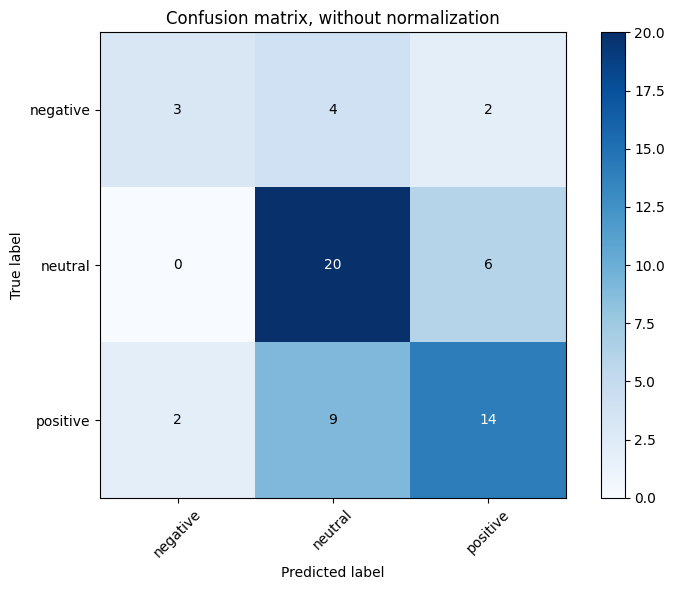

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Loop over data dimensions and create text annotations.
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > cm.max() / 2. else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions_rf)  # Ensure y_test and predictions_rf are defined
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix, classes=['negative', 'neutral', 'positive'],
                      title='Confusion matrix, without normalization')
plt.show()

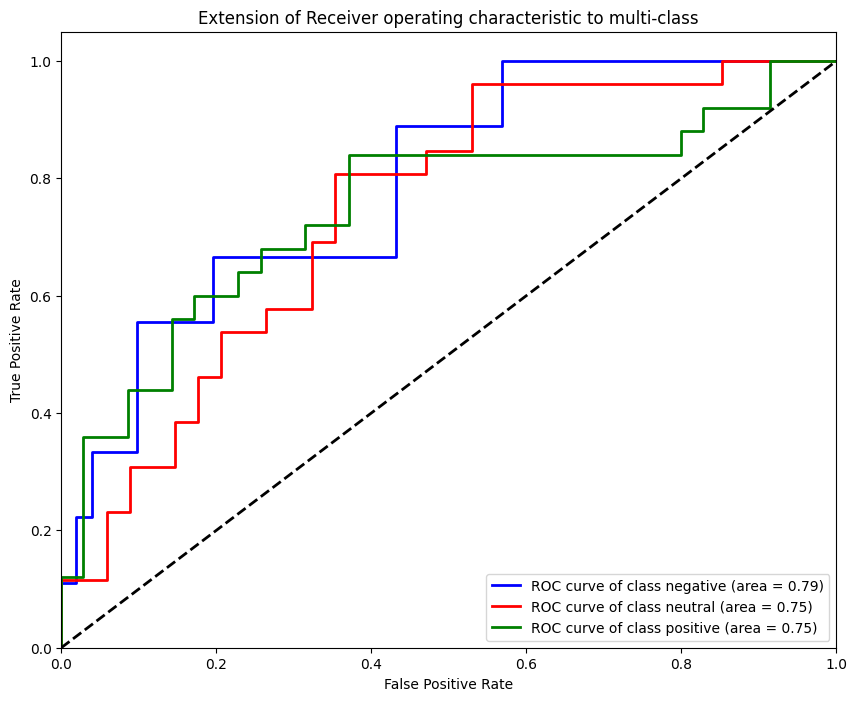

In [13]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

# Binarizing the output
y_bin = label_binarize(y, classes=['negative', 'neutral', 'positive'])
n_classes = y_bin.shape[1]

# Split the binarized labels
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.3, random_state=42)

# Train the OneVsRestClassifier for multi-class ROC
classifier = OneVsRestClassifier(LogisticRegression(solver='lbfgs'))
classifier.fit(X_train, y_train_bin)
y_score = classifier.decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(['negative', 'neutral', 'positive'][i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

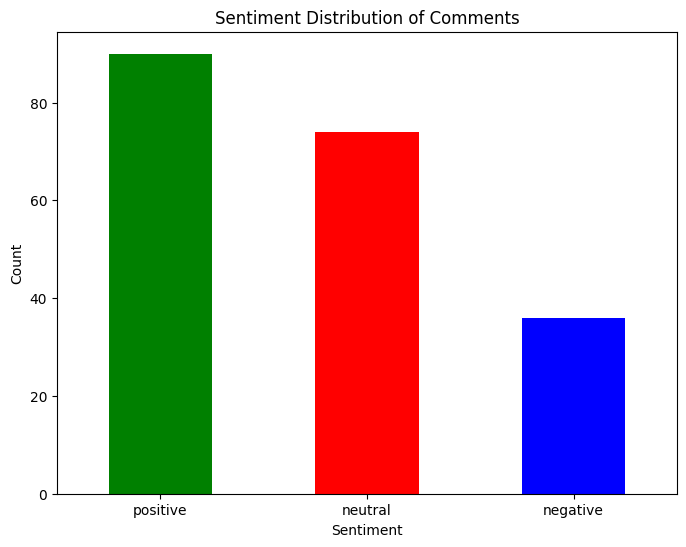

In [49]:
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution of Comments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

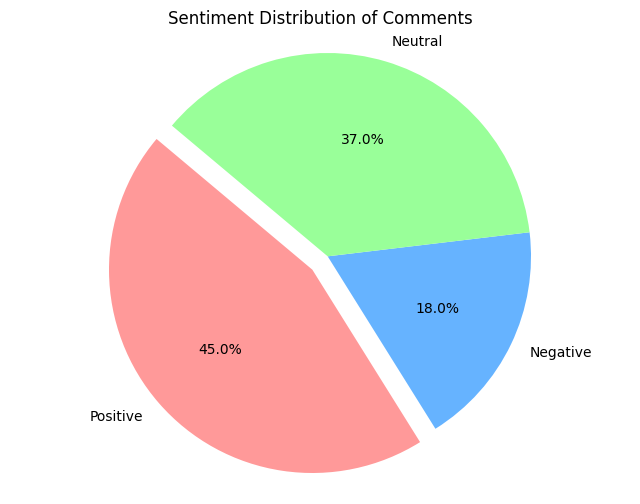

In [52]:
positive_count = df[df['sentiment'] == 'positive'].shape[0]
negative_count = df[df['sentiment'] == 'negative'].shape[0]
neutral_count = df[df['sentiment'] == 'neutral'].shape[0]


labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_count, negative_count, neutral_count]
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0.1, 0, 0)  

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Comments')
plt.axis('equal') 
plt.show()